# Chapter 1 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Analyzing Variability: Descriptive Statistics

## Random Phenomena and the Structure of Observations

In [2]:
pip install mistat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mistat
data = mistat.load_data('CYCLT')
print(data.head())

0    1.008
1    1.098
2    1.120
3    0.423
4    1.021
Name: CYCLT, dtype: float64


In [4]:
import pandas as pd
from itertools import zip_longest
import mistat

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

cyclt = mistat.load_data('CYCLT')

print('\\begin{tabular}{rrrrr}\\toprule')
for chunk in grouper(cyclt, 5):
    print(' & '.join([f'{v:.3f}' for v in chunk]))
    print('\\\\')
print('\\bottomrule\\end{tabular}')

\begin{tabular}{rrrrr}\toprule
1.008 & 1.098 & 1.120 & 0.423 & 1.021
\\
1.069 & 0.271 & 0.431 & 1.095 & 1.088
\\
1.117 & 1.080 & 0.206 & 0.330 & 0.314
\\
1.132 & 0.586 & 1.118 & 0.319 & 0.664
\\
1.141 & 0.662 & 0.531 & 0.280 & 0.489
\\
1.080 & 0.628 & 0.302 & 0.179 & 1.056
\\
0.449 & 1.057 & 0.437 & 0.175 & 0.482
\\
0.275 & 1.084 & 0.287 & 1.068 & 1.069
\\
0.215 & 1.107 & 0.348 & 0.213 & 0.200
\\
0.187 & 0.339 & 0.224 & 1.009 & 0.560
\\
\bottomrule\end{tabular}


In [5]:
from scipy.stats import binom
import numpy as np
np.random.seed(seed=1) # scipy uses numpy to create random numbers

X = binom.rvs(1, 0.5, size=40)

print(', '.join([f'{v}' for v in X[:20]]) + ',\\\\')
print(', '.join([f'{v}' for v in X[20:]]) + '.\\\\')

0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,\\
1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1.\\


In [6]:
np.set_printoptions(linewidth=60)

In [7]:
from scipy.stats import binom
import numpy as np

X = binom.rvs(1, 0.5, size=50)

print(X)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1]


In [8]:
np.set_printoptions(linewidth=75)

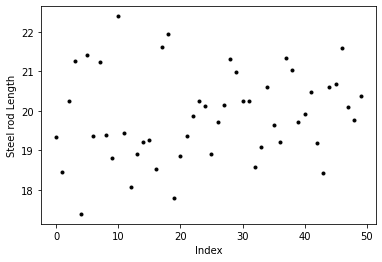

In [9]:
import matplotlib.pyplot as plt

steelrod = mistat.load_data('STEELROD')

# create a scatterplot
ax = steelrod.plot(y='STEELROD', style='.', color='black')
ax.set_xlabel('Index')            # set the x axis title
ax.set_ylabel('Steel rod Length') # set the y axis title
plt.show()

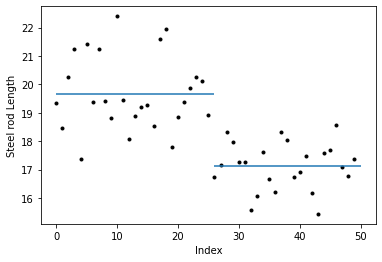

In [10]:
steelrod[26:] = steelrod[26:] - 3

ax = steelrod.plot(y='STEELROD', style='.', color='black')
ax.set_xlabel('Index')
ax.set_ylabel('Steel rod Length')
ax.hlines(y=steelrod[:26].mean(), xmin=0, xmax=26)
ax.hlines(y=steelrod[26:].mean(), xmin=26, xmax=len(steelrod))
plt.show()

In [11]:
np.random.seed(seed=1)

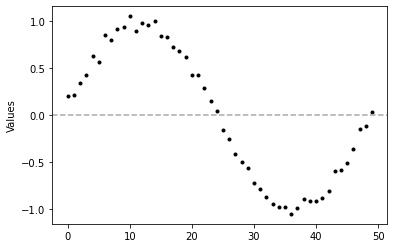

In [12]:
import math
from scipy.stats import norm

# create a list of 50 values forming a sine curve
x = [math.sin(x * 2 * math.pi / 50) for x in range(1, 51)]

# Add a random normal with mean 0 and standard deviation 0.05
x = [xi + norm.rvs(loc=0, scale=0.05) for xi in x]

ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values')
ax.axhline(y=0, linestyle='--', color='darkgray')
plt.show()

## Accuracy and Precision of Measurements

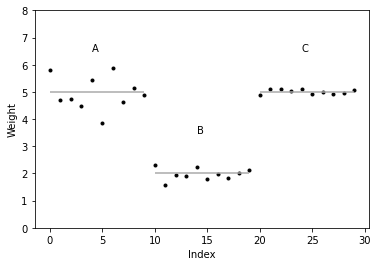

In [13]:
np.random.seed(seed=1)

x = np.concatenate([5 + norm.rvs(loc=0, scale=0.5, size=10),
                    2 + norm.rvs(loc=0, scale=0.2, size=10),
                    5 + norm.rvs(loc=0, scale=0.1, size=10)])
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values')
ax.set_xlabel('Index')
ax.set_ylabel('Weight')
ax.hlines(y=5, xmin=0, xmax=9, color='darkgray')
ax.hlines(y=2, xmin=10, xmax=19, color='darkgray')
ax.hlines(y=5, xmin=20, xmax=29, color='darkgray')
ax.text(4, 6.5, 'A')
ax.text(14, 3.5, 'B')
ax.text(24, 6.5, 'C')
ax.set_ylim(0, 8)
plt.show()

## The Population and the Sample

## Descriptive Analysis of Sample Values

### Frequency Distributions of Discrete Random Variables

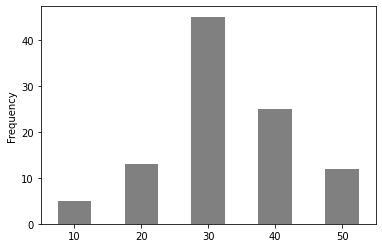

In [14]:
X = pd.DataFrame({'x': [10, 20, 30, 40, 50],
                  'Frequency': [5, 13, 45, 25, 12]})
ax = X.plot.bar(x='x', y='Frequency', rot=0, color='grey', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.show()

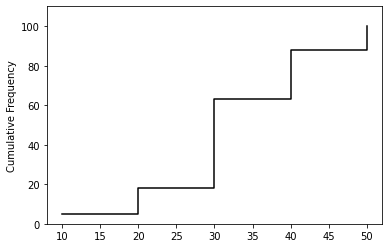

In [15]:
X['Cumulative Frequency'] = np.cumsum(X['Frequency'])
ax = X.plot.line(x='x', y='Cumulative Frequency', drawstyle='steps-post',
                 color='black', legend=False)
ax.set_xlabel('')
ax.set_ylabel('Cumulative Frequency')
ax.set_ylim(0, 110)
plt.show()

In [16]:
blemishes = mistat.load_data('BLEMISHES')
X = blemishes['count']
print(', '.join([f'{v}' for v in X[:len(X)//2]]) + ',\\\\')
print(', '.join([f'{v}' for v in X[len(X)//2:]]) + '.\\\\')

0, 2, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1, 2, 0,\\
0, 0, 1, 1, 3, 0, 1, 0, 0, 0, 5, 1, 0, 2, 0.\\


In [17]:
blemishes = mistat.load_data('BLEMISHES')

In [18]:
blemishes.head(3)

,plateID,count
0,1,0
1,2,2
2,3,0


In [19]:
print(blemishes.iloc[1, 0])
print(blemishes.iloc[2, 1])

2
0


In [20]:
blemishes['count'].head(5)

0    0
1    2
2    0
3    0
4    1
Name: count, dtype: int64

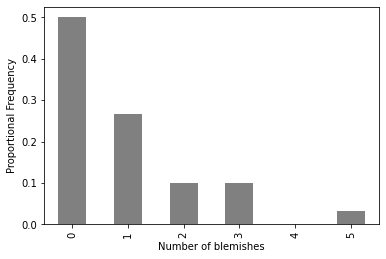

In [21]:
# use value_counts with normalize to get relative frequencies
X = pd.DataFrame(blemishes['count'].value_counts(normalize=True))
X.loc[4, 'count'] = 0  # there are no samples with 4 blemishes add a row
X = X.sort_index()  # sort by number of blemishes

ax = X['count'].plot.bar(color='grey', legend=False)
ax.set_xlabel('Number of blemishes')
ax.set_ylabel('Proportional Frequency')
plt.show()

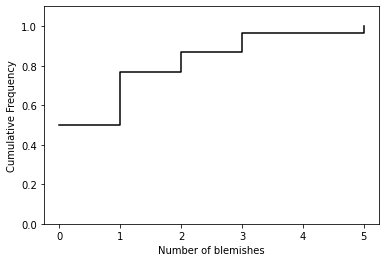

In [22]:
X['Number'] = X.index  # add number of blemishes as column
X['Cumulative Frequency'] = X['count'].cumsum()
ax = X.plot.line(x='Number', y='Cumulative Frequency', color='black',
                 drawstyle='steps-post', legend=False)
ax.set_xlabel('Number of blemishes')
ax.set_ylabel('Cumulative Frequency')
ax.set_ylim(0, 1.1)
plt.show()

### Frequency Distributions of Continuous Random Variables

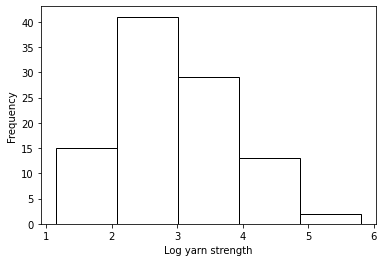

In [23]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.hist(bins=5, color='white', edgecolor='black', legend=False)
ax.set_xlabel('Log yarn strength')
plt.show()

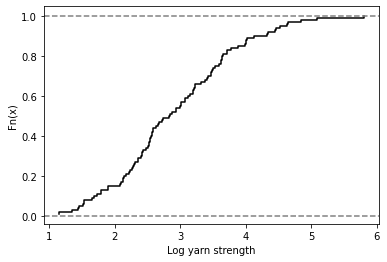

In [24]:
ecdf = pd.DataFrame({'Log yarn strength': X.sort_values(),
                     'Fn(x)': range(1, len(X) + 1)})
ecdf['Fn(x)'] = ecdf['Fn(x)'] / len(X)
ax = ecdf.plot(x='Log yarn strength', y='Fn(x)', color='black', drawstyle='steps-post', legend=False)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Fn(x)')
plt.show()

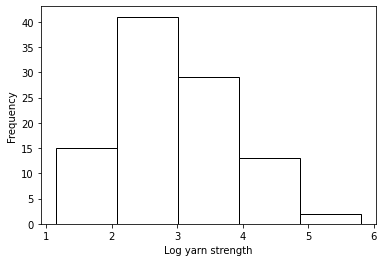

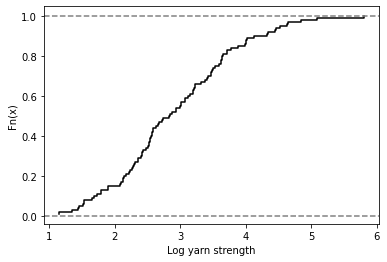

In [25]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.hist(bins=5, color='white', edgecolor='black', legend=False)
ax.set_xlabel('Log yarn strength')
plt.show()

ecdf = pd.DataFrame({'Log yarn strength': X.sort_values(),
                     'Fn(x)': range(1, len(X) + 1)})
ecdf['Fn(x)'] = ecdf['Fn(x)'] / len(X)
ax = ecdf.plot(x='Log yarn strength', y='Fn(x)', color='black',
               drawstyle='steps-post', legend=False)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Fn(x)')
plt.show()

### Statistics of the Ordered Sample

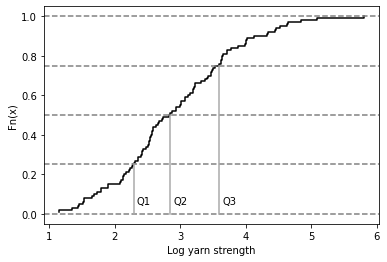

In [26]:
ecdf = pd.DataFrame({'Log yarn strength': X.sort_values(ignore_index=True),
                     'Fn(x)': range(1, len(X) + 1)})
ecdf['Fn(x)'] = ecdf['Fn(x)'] / len(X)
ax = ecdf.plot(x='Log yarn strength', y='Fn(x)', color='black', drawstyle='steps-post', legend=False)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
for i, y in enumerate([25, 50, 75], 1):
    ax.axhline(y=y/100, color='grey', linestyle='--')
    quartile = ecdf['Log yarn strength'][y]
    ax.plot([quartile, quartile], [y/100, 0], color='darkgrey')
    ax.text(quartile + 0.05, 0.05, f'Q{i}')
ax.set_ylabel('Fn(x)')
plt.show()

In [27]:
cyclt = mistat.load_data('CYCLT')

print(cyclt.quantile(q=[0, 0.25, 0.5, 0.75, 1.0]))

0.00    0.1750
0.25    0.3050
0.50    0.5455
0.75    1.0690
1.00    1.1410
Name: CYCLT, dtype: float64


In [28]:
print(cyclt.mean())

0.6524599999999999


In [29]:
print(cyclt.describe())

count    50.000000
mean      0.652460
std       0.372971
min       0.175000
25%       0.305000
50%       0.545500
75%       1.069000
max       1.141000
Name: CYCLT, dtype: float64


In [30]:
cyclt_min, q1, q2, q3, cyclt_max = [f'{f:.4f}' for f in cyclt.quantile(q=[0, 0.25, 0.5, 0.75, 1.0])]
cyclt_mean = f'{cyclt.mean():.4f}'

### Statistics of Location and Dispersion

In [31]:
X = mistat.load_data('YARNSTRG')
print(f'Skewness {X.skew():.4f}')     # Computes the skewness
print(f'Kurtosis {X.kurtosis():.4f}') # Computes the kurtosis

from scipy.stats import skew, kurtosis
print(f'Skewness {skew(X):.4f}')     # Computes the skewness
print(f'Kurtosis {kurtosis(X):.4f}') # Computes the kurtosis

Skewness 0.4164
Kurtosis -0.0080
Skewness 0.4102
Kurtosis -0.0670


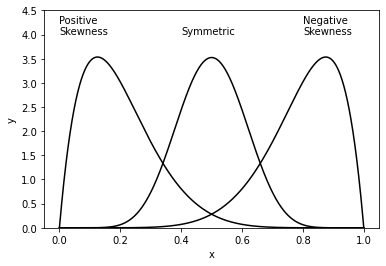

In [32]:
from scipy.stats import beta

x = np.linspace(0, 1, 2000)
df = pd.DataFrame({'x': x,
                   'pos_skew': beta(2, 8).pdf(x),
                   'normal_skew': beta(10, 10).pdf(x),
                   'neg_skew': beta(8, 2).pdf(x),
                  })
ax = df.plot.line(x='x', y=['pos_skew', 'normal_skew', 'neg_skew'], legend=False, color='black')
ax.set_ylabel('y')
ax.set_ylim(0, 4.5)
ax.text(0, 4, 'Positive \nSkewness')
ax.text(0.4, 4, 'Symmetric')
ax.text(0.8, 4, 'Negative \nSkewness')
plt.show()

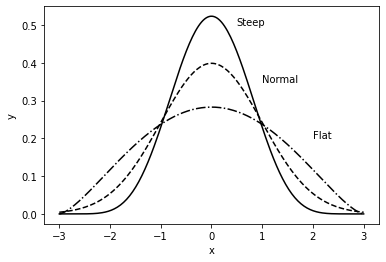

In [33]:
from scipy.stats import beta, norm

x = np.linspace(-3, 3, 200)
df = pd.DataFrame({'x': x,
                   'steep': beta(8, 8, loc=-3, scale=6).pdf(x),
                   'flat': beta(2.5, 2.5, loc=-3, scale=6).pdf(x),
                   'normal': norm().pdf(x),
                  })
ax = df.plot.line(x='x', y='steep', legend=False, color='black')
df.plot.line(x='x', y='normal', legend=False, color='black', linestyle='--', ax=ax)
df.plot.line(x='x', y='flat', legend=False, color='black', linestyle='-.', ax=ax)
ax.set_ylabel('y')
ax.text(0.5, 0.5, 'Steep')
ax.text(1.0, 0.35, 'Normal')
ax.text(2.0, 0.2, 'Flat')
plt.show()

In [34]:
X = mistat.load_data('YARNSTRG')
yarn_mean = f'{X.mean():.4f}'
yarn_geom = f'{math.exp(X.mean()):.4f}'
yarn_var = f'{X.var():.4f}'
yarn_sd = f'{X.std():.4f}'
yarn_kurt = f'{X.kurtosis():.4f}'
yarn_skew = f'{X.skew():.4f}'
yarn_gamma = f'{X.std()/X.mean():.4f}'

## Prediction Intervals

## Additional Techniques of Exploratory Data Analysis

### Density Plots

<AxesSubplot:ylabel='Density'>

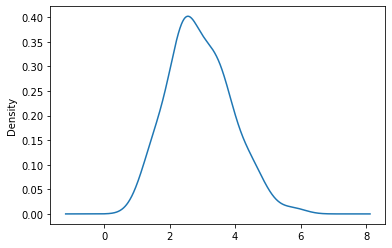

In [35]:
X = mistat.load_data('YARNSTRG')
X.plot.density()

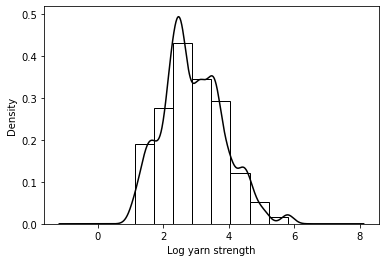

In [36]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.hist(bins=8, color='white', edgecolor='black', legend=False, density=True)
X.plot.density(bw_method=0.2, ax=ax, color='black')
ax.set_xlabel('Log yarn strength')
plt.show()

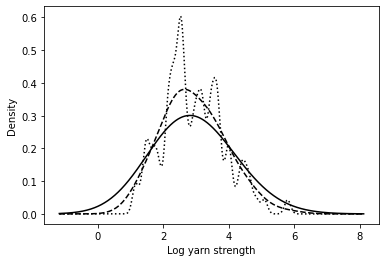

In [37]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.density(bw_method=0.1, ls=':', color='black')
X.plot.density(bw_method=0.5, ax=ax, ls='--', color='black')
X.plot.density(bw_method=1, ax=ax, color='black')
ax.set_xlabel('Log yarn strength')
plt.show()

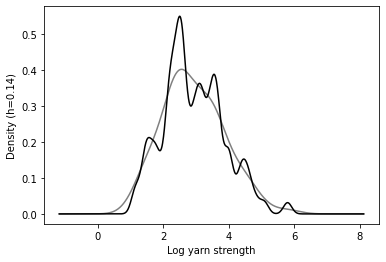

In [38]:
from KDEpy.bw_selection import improved_sheather_jones
h = improved_sheather_jones(X.values.reshape(-1, 1))
ax = X.plot.density(color='grey')
X.plot.density(bw_method=h, color='black', ax=ax)
ax.set_xlabel('Log yarn strength')
ax.set_ylabel(f'Density (h={h:.2f})')
plt.show()

### Box and Whiskers Plots

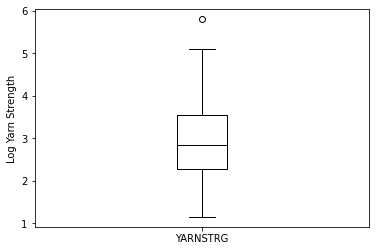

In [39]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.box(color='black')
ax.set_ylabel('Log Yarn Strength')
plt.show()

In [40]:
X = mistat.load_data('YARNSTRG')
yarn_q1, yarn_q3 = X.quantile(q=[0.25, 0.75])
lw = f'{yarn_q1 - 1.5*(yarn_q3 - yarn_q1):.4f}'
uw = f'{yarn_q3 + 1.5*(yarn_q3 - yarn_q1):.4f}'
yarn_iqr = f'{yarn_q3 - yarn_q1:.4f}'
yarn_q1, yarn_me, yarn_q3 = [f'{q:.4f}' for q in X.quantile(q=[0.25, 0.5, 0.75])]
yarn_min = f'{X.min():.4f}'
yarn_max = f'{X.max():.4f}'
yarn_mean = f'{X.mean():.4f}'
yarn_std = f'{X.std():.4f}'

### Quantile Plots

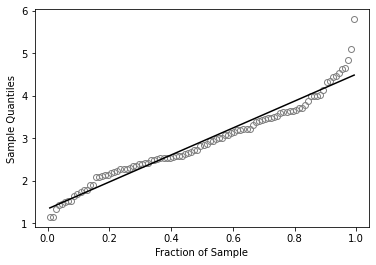

In [41]:
from scipy.stats import probplot, uniform

ax = plt.subplot()
res = probplot(X, dist=uniform, plot=ax)
ax.set_xlabel('Fraction of Sample')
ax.set_ylabel('Sample Quantiles')
ax.set_title('')
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
plt.show()

### Stem-and-Leaf Diagrams

In [42]:
X = mistat.load_data('YARNSTRG')

mistat.stemLeafDiagram(X, 2, leafUnit=0.1, latex=True)

       5 &     1 &  11344
\\
      15 &     1 &  5556677788
\\
      34 &     2 &  0011112222233344444
\\
    (21) &     2 &  555555555566677888999
\\
      45 &     3 &  000011112223344444
\\
      27 &     3 &  5556666677789
\\
      14 &     4 &  00013344
\\
       6 &     4 &  5668
\\
       2 &     5 &  0
\\
       1 &     5 &  7
\\


In [43]:
X = mistat.load_data('OELECT')
mistat.stemLeafDiagram(X, 5, latex=True)

       5 &    21 &  01111
\\
      10 &    21 &  22333
\\
      19 &    21 &  444445555
\\
      37 &    21 &  666666667777777777
\\
    (22) &    21 &  8888888888889999999999
\\
      40 &    22 &  0000000001111111111
\\
      21 &    22 &  22233333
\\
      13 &    22 &  44455555
\\
       5 &    22 &  6777
\\
       1 &    22 &  8
\\


### Robust Statistics for Location and Dispersion

In [44]:
from scipy.stats import trim_mean

Oelect = mistat.load_data('OELECT')

def mySummary(x, trim=0):
  """ Returns summary information for list x

  The optional argument trim can be used to calculate a trimmed mean
  """
  x = pd.Series(x)  # convert to pandas series

  quantiles = list(x.quantile(q=[0, 0.25, 0.5, 0.75, 1.0]))
  trimmed_mean = trim_mean(x, trim)

  # return the summary information as pandas Series
  return pd.Series({
    'Min': quantiles[0],
    'Q1': quantiles[1],
    'Median': quantiles[2],
    'Mean': trimmed_mean,
    'Q3': quantiles[3],
    'Max': quantiles[4],
    'SD': x.std(),
    'IQR': quantiles[3] - quantiles[1],
  })

In [45]:
print(pd.DataFrame({
  'untrimmed': mySummary(Oelect),
  'trimmed': mySummary(Oelect, trim=0.05),
}))

         untrimmed     trimmed
Min     210.896000  210.896000
Q1      216.846000  216.846000
Median  219.096000  219.096000
Mean    219.248020  219.218198
Q3      221.686000  221.686000
Max     228.986000  228.986000
SD        4.003992    4.003992
IQR       4.840000    4.840000


In [46]:
# sort and reset the index
OutVolt = Oelect.sort_values(ignore_index=True)
# in Python index starts at 0, so the 99-th value is at position 98
OutVolt[98] = 2289.86
print(pd.DataFrame({
  'untrimmed': mySummary(OutVolt),
  'trimmed': mySummary(OutVolt, trim=0.05),
}))

          untrimmed      trimmed
Min      210.896000   210.896000
Q1       216.846000   216.846000
Median   219.096000   219.096000
Mean     240.064929   219.218198
Q3       221.686000   221.686000
Max     2289.860000  2289.860000
SD       208.150486   208.150486
IQR        4.840000     4.840000


In [47]:
from scipy.stats import iqr

def trim_std(data, alpha):
  data = np.array(data)
  data.sort()
  n = len(data)
  low = int(n * alpha) + 1
  high = int(n * (1 - alpha))
  return data[low:(high + 1)].std()

print('S_alpha', trim_std(OutVolt, 0.025))
print('sigma:', iqr(OutVolt) / 1.349)

S_alpha 3.5896765570264395
sigma: 3.587842846552984


## Chapter Highlights

## Exercises